In [1]:
import dynamo as dyn
import matplotlib.pyplot as plt
import numpy as np

# Reading Data

In [2]:
adata = dyn.read('./data/Pancreas/pancreatic_endocrinogenesis_g1000_dyn.h5ad')
adata

AnnData object with n_obs × n_vars = 3696 × 1000 
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'Size_Factor', 'initial_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'highly_variable_genes', 'pass_basic_filter', 'log_cv', 'score', 'log_m', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_velocity', 'use_for_transition'
    uns: 'PCs', 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'dynamics', 'explained_variance_ratio_', 'feature_selection', 'grid_velocity_pca', 'grid_velocity_scv', 'grid_velocity_umap', 'neighbors', 'pca', 'umap_fit'
    obsm: 'X', 'X_pca', 'X_scv', 'X_umap', 'cell_cycle_scores', 'velocity_pca', 'velocity_scv', 'velocity_uma

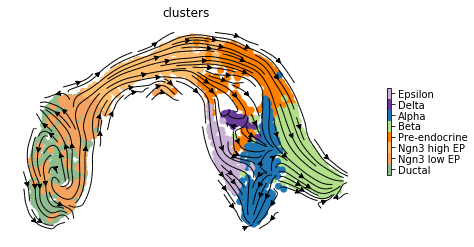

In [3]:
plt.figure(figsize=(8, 4))
dyn.pl.zscatter(adata, basis='umap', color='clusters')
dyn.pl.zstreamline(adata, basis='umap', constant_lw=True)

# Top Expression Genes

In [4]:
adata.var['use_for_dynamics']

index
Sbspon     True
Adgrb3     True
Fhl2       True
Klf7       True
Akr1cl     True
           ... 
Ap1s2      True
Tmem27     True
Uty        True
Ddx3y      True
Eif2s3y    True
Name: use_for_dynamics, Length: 1000, dtype: bool

In [5]:
rank = dyn.vf.rank_genes(adata, 'M_s', groups='clusters', abs=True, output_values=False)
rank[:30]

,Alpha,Beta,Delta,Ductal,Epsilon,Ngn3 high EP,Ngn3 low EP,Pre-endocrine
0,Pyy,Pyy,Pyy,Spp1,Ghrl,Rpl18a,Spp1,Malat1
1,Gcg,Iapp,Sst,Rpl18a,Pyy,Tmsb4x,Rpl18a,Chgb
2,Iapp,Gnas,Rbp4,Rpl32,Rbp4,Rpl32,Rpl32,Gnas
3,Gnas,Malat1,Iapp,Rps19,Malat1,Rps19,Rps19,Rpl18a
4,Ttr,Rbp4,Malat1,Rps4x,Gnas,Rps4x,Rps4x,Pyy
5,Malat1,Ins2,Gnas,Rps8,Ttr,Malat1,Rps8,Chga
6,Rbp4,Nnat,Rpl18a,Rplp0,Lrpprc,Rps8,Rplp0,Rpl32
7,Chgb,Ttr,Ttr,Rps11,Isl1,Rplp0,Rps11,Rps4x
8,Rpl18a,Chgb,Rpl32,Rpl10a,Rpl18a,Rps11,Malat1,Rps19
9,Rpl32,Rpl18a,Rps4x,Malat1,Cdkn1a,Mdk,Rpl10a,Actg1


# Top Velocity Genes

Genes are sorted based on their velocity (absolute) values, for each cell group: 

In [8]:
rank = dyn.vf.rank_genes(adata, 'velocity_S', groups='clusters', abs=True, output_values=False)
rank[:6]

,Alpha,Beta,Delta,Ductal,Epsilon,Ngn3 high EP,Ngn3 low EP,Pre-endocrine
0,Malat1,Malat1,Malat1,Malat1,Malat1,Malat1,Malat1,Ptprn2
1,Ptprn2,Ins2,Meg3,Meg3,Cacnb2,Meg3,Meg3,Malat1
2,Auts2,Ptprn2,Cacnb2,Rbms3,Meg3,Ptprn2,Rbms3,Meg3
3,Cacnb2,Meg3,Auts2,Ttll3,Ptprn2,Cacna2d1,Auts2,Gse1
4,Meg3,Gse1,Gse1,Zbtb20,Auts2,Kcnb2,Ttll3,Actb
5,Gse1,Cacnb2,Ptprn2,Auts2,Gse1,Cadps,Zbtb20,Cacna2d1


The DataFrame can be reversed to see genes with low velocity (absolute) values. They are either inactive or house-keeping genes.

In [5]:
rank[::-1][:30]

,Alpha,Alpha_values,Beta,Beta_values,Delta,Delta_values,Ductal,Ductal_values,Epsilon,Epsilon_values,Ngn3 high EP,Ngn3 high EP_values,Ngn3 low EP,Ngn3 low EP_values,Pre-endocrine,Pre-endocrine_values
999,Gm37350,0.000000,Gm37350,0.000000,Megf6,0.000000,Kcnip3,0.000000,Slc2a2,0.000000,Ptprz1,0.000000,Slc30a8,0.000000,Gm37350,0.000063
998,Akr1cl,0.000067,Smoc2,0.000003,Megf11,0.000000,Gm13373,0.000000,Cdc25c,0.000000,Frzb,0.000021,Rab37,0.000038,Smoc2,0.000087
997,Sst,0.000086,Cxcl12,0.000266,Smoc2,0.000000,Pappa2,0.000000,Akr1cl,0.000000,Sst,0.000057,Slc38a5,0.000040,Fmo1,0.000216
996,Smoc2,0.000122,Gm42637,0.000388,Sema3g,0.000000,Neurod1,0.000000,Smoc2,0.000000,Gria2,0.000082,Cntfr,0.000046,Cxcl12,0.000328
995,Gm42637,0.000238,Ccnb1,0.000483,Slc39a2,0.000000,Slc38a5,0.000042,Gm37350,0.000000,Irx2,0.000090,Sst,0.000056,Calml4,0.000471
994,Epb42,0.000266,Col9a1,0.000542,Clspn,0.000000,Ripply3,0.000046,P2ry1,0.000000,Cytip,0.000119,Irx2,0.000070,Gins2,0.000553
993,Hhex,0.000339,Akr1cl,0.000556,Tmem178,0.000000,Sst,0.000049,Cxcl12,0.000040,Peg10,0.000162,Ripply3,0.000077,Gsta3,0.000579
992,Ccnb1,0.000449,Gins2,0.000596,Gm37350,0.000000,Lhx1os,0.000053,Notum,0.000042,Iapp,0.000225,Neurod1,0.000085,P2ry1,0.000645
991,Rest,0.000532,Serpina1c,0.000631,Mis18bp1,0.000000,Hpca,0.000074,Sst,0.000167,Cntfr,0.000288,Gm13373,0.000107,Osgin1,0.001138
990,Psat1,0.000689,Acot7,0.000658,Epb42,0.000000,Epb42,0.000080,Ndc80,0.000204,Tmem27,0.000300,Mnx1,0.000108,Ccnb1,0.001258


# Vector Field-Related Rankings

First we reconstruct the vector field using the first 30 principal axes:

D:\Yan\Xing Lab\dynamo-release\dynamo\vectorfield\topography.py:718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs[control_point][vf_dict['VecFld']['ctrl_idx']] = True
D:\Yan\Xing Lab\dynamo-release\dynamo\vectorfield\topography.py:719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs[inlier_prob][valid_ids] = vf_dict['VecFld']['P'].flatten()


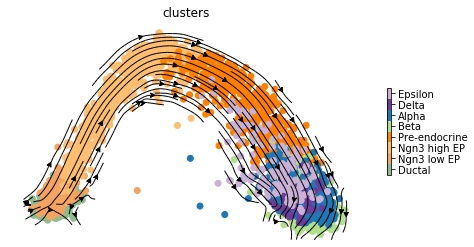

In [6]:
dyn.vf.VectorField(adata, basis='pca', ndims=30, M=1000)
plt.figure(figsize=(8, 4))
dyn.pl.zscatter(adata, basis='pca_SparseVFC', color='clusters')
dyn.pl.zstreamline(adata, basis='pca_SparseVFC', constant_lw=True)

## Jacobian Calculation

Then we calculate the Jacobian for 1000 randomly selected cells. All 1000 genes are used as both regulators and effectors, so we end up with a 30x30 Jacobian matrix in the 30 PC space, and a 1000x1000 full Jacobian matrix in the gene expression space, for each cell. The `store_in_adata=True` argument saves the output into `adata.uns['jacobian_pca']`. Jacobian is the foundation of many downstream analyses.

In [7]:
dyn.pp.top_pca_genes(adata, n_top_genes=100)

AnnData object with n_obs × n_vars = 3696 × 1000 
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'Size_Factor', 'initial_cell_size', 'ntr', 'cell_cycle_phase', 'control_point_pca', 'inlier_prob_pca', 'obs_vf_angle_pca'
    var: 'highly_variable_genes', 'pass_basic_filter', 'log_cv', 'score', 'log_m', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_velocity', 'use_for_transition', 'pca_genes'
    uns: 'PCs', 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'dynamics', 'explained_variance_ratio_', 'feature_selection', 'grid_velocity_pca', 'grid_velocity_scv', 'grid_velocity_umap', 'neighbors', 'pca', 'umap_fit', 'VecFld_pca'
    obsm: 'X', 'X_pca'

In [8]:
dyn.vf.jacobian(adata, sampling='random', regulators='pca_genes', store_in_adata=True)

Transforming subset Jacobian: 100%|███████████████████████████████████████████████| 1000/1000 [00:04<00:00, 210.99it/s]
D:\Yan\Xing Lab\dynamo-release\dynamo\vectorfield\vector_calculus.py:262: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs['jacobian_det_' + basis][cell_idx] = Js_det


AnnData object with n_obs × n_vars = 3696 × 1000 
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'Size_Factor', 'initial_cell_size', 'ntr', 'cell_cycle_phase', 'control_point_pca', 'inlier_prob_pca', 'obs_vf_angle_pca', 'jacobian_det_pca'
    var: 'highly_variable_genes', 'pass_basic_filter', 'log_cv', 'score', 'log_m', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_velocity', 'use_for_transition', 'pca_genes'
    uns: 'PCs', 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'dynamics', 'explained_variance_ratio_', 'feature_selection', 'grid_velocity_pca', 'grid_velocity_scv', 'grid_velocity_umap', 'neighbors', 'pca', 'umap_fit', 'VecFld_pca', '

## Jacobian Rankings

The following function ranks genes based on the "divergence". Note that the "divergence" here is different from the mathematically defined "divergence" which is the trace of the Jacobian. The "divergence" we are talking about here is basically the diagonal elements of the Jacobian, i.e. the self-activation\inhibition terms. The results are stored in `adata.uns['rank_div_gene_jacobian_pca']`.

In [8]:
dyn.vf.rank_divergence_genes(adata, groups='clusters', output_values=True)

,Alpha,Alpha_values,Beta,Beta_values,Delta,Delta_values,Ductal,Ductal_values,Epsilon,Epsilon_values,Ngn3 high EP,Ngn3 high EP_values,Ngn3 low EP,Ngn3 low EP_values,Pre-endocrine,Pre-endocrine_values
0,Fos,0.000465,Gcg,0.001025,Gcg,0.002046,Cdkn1a,0.002961,Gcg,0.005822,Pyy,0.004358,Cdkn1a,0.006170,Pyy,0.004739
1,Hist1h2bc,0.000323,Krt18,0.000415,Ins2,0.001085,Gcg,0.001362,Ghrl,0.002392,Chgb,0.003526,Cck,0.001768,Ghrl,0.002328
2,Cdkn1a,0.000310,Nnat,0.000318,Hhex,0.000955,Pyy,0.001263,Xist,0.002366,Chga,0.002952,Atp1b1,0.001681,Iapp,0.002089
3,Pdx1,0.000197,Spp1,0.000189,Nnat,0.000797,Lrpprc,0.001134,Ttr,0.001899,Cck,0.002808,Mpzl1,0.001480,Rbp4,0.001832
4,Cdkn1c,0.000163,Malat1,0.000075,Sst,0.000745,Slc38a5,0.000868,Slc38a5,0.001634,Gcg,0.002532,Lurap1l,0.001428,Gcg,0.001715
5,S100a11,0.000162,Ccnb2,0.000072,Dlk1,0.000492,2810417H13Rik,0.000750,Cck,0.000835,Isl1,0.002443,Cyr61,0.001383,Dlk1,0.001709
6,Krt7,0.000156,Lurap1l,0.000072,Nkx6-1,0.000453,Chgb,0.000732,Chga,0.000594,Cdkn1a,0.002287,Gcg,0.001292,Sst,0.001007
7,Btg2,0.000127,Hist1h2bc,0.000067,Ppp1r1a,0.000286,Sst,0.000630,Sst,0.000553,Lrpprc,0.002049,Btbd17,0.001246,Pdx1,0.000903
8,1700086L19Rik,0.000107,Rpl36a,0.000061,Chgb,0.000277,Ghrl,0.000593,Mdk,0.000535,Tm4sf4,0.002000,Id2,0.001064,Nnat,0.000794
9,Sst,0.000105,Ptn,0.000060,Ociad2,0.000262,Krt18,0.000587,Gnb1,0.000512,Ghrl,0.001864,Nudt19,0.000936,Arx,0.000741


We can also rank all other elements in the Jacobian. There are 5 ways to rank the Jacobian:

(1) `'full_reg'`: top regulators are ranked for each effector for each cell group;

(2) `'full eff'`: top effectors are ranked for each regulator for each cell group;

(3) '`reg`': top regulators in each cell group;

(4) '`eff`': top effectors in each cell group;

(5) '`int`': top effector-regulator pairs in each cell group.


The default mdoe is `'full_reg'`:

In [18]:
rank = dyn.vf.rank_jacobian_genes(adata, groups='clusters', abs=True, output_values=True)
rank['Ductal']

,Sbspon,Sbspon_values,Adgrb3,Adgrb3_values,Fhl2,Fhl2_values,Klf7,Klf7_values,Akr1cl,Akr1cl_values,...,Ap1s2,Ap1s2_values,Tmem27,Tmem27_values,Uty,Uty_values,Ddx3y,Ddx3y_values,Eif2s3y,Eif2s3y_values
0,Cdkn1a,0.000495,Cdkn1a,2.463282e-05,Iapp,2.671683e-04,Xist,0.000473,Xist,0.000537,...,Xist,7.524011e-05,Xist,0.000521,Xist,1.074326e-04,Xist,0.001114,Xist,0.001227
1,Gcg,0.000341,Xist,2.454419e-05,Xist,2.406387e-04,Hist1h2bc,0.000403,Cdkn1a,0.000499,...,Ghrl,7.006308e-05,Pyy,0.000453,Cdkn1a,7.290656e-05,Gcg,0.000629,Gcg,0.000718
2,Xist,0.000328,Hist1h2bc,2.257338e-05,Fos,2.369208e-04,Cck,0.000374,Fos,0.000490,...,Lrpprc,6.806204e-05,Hist1h2bc,0.000395,Gcg,7.187424e-05,Ttr,0.000543,Chgb,0.000630
3,Pyy,0.000297,Gcg,2.211766e-05,Lrpprc,2.039365e-04,Cdkn1a,0.000362,Hist1h2bc,0.000465,...,Iapp,6.525394e-05,Cdkn1a,0.000353,Iapp,7.069424e-05,Chgb,0.000539,Cdkn1a,0.000623
4,Hist1h2bc,0.000284,Dlk1,2.203886e-05,Chgb,1.699229e-04,Fos,0.000362,Pyy,0.000410,...,Fos,5.912772e-05,Dlk1,0.000331,Slc38a5,6.250229e-05,Cdkn1a,0.000502,Ttr,0.000607
5,Fos,0.000239,Iapp,2.164928e-05,Tmsb4x,1.645349e-04,Ttr,0.000327,Chgb,0.000396,...,Ttr,5.885107e-05,Ghrl,0.000329,Ttr,6.084223e-05,Pyy,0.000501,Pyy,0.000573
6,Ttr,0.000226,Fos,2.164301e-05,Pyy,1.632746e-04,Tmsb4x,0.000287,Ttr,0.000383,...,Cdkn1a,5.365083e-05,Ttr,0.000322,Chgb,6.018546e-05,Iapp,0.000490,Iapp,0.000566
7,Chga,0.000221,Ghrl,2.106420e-05,Cdkn1a,1.558750e-04,Pyy,0.000271,Chga,0.000361,...,Pyy,5.267129e-05,Rbp4,0.000307,Hist1h2bc,5.671092e-05,Slc38a5,0.000461,Slc38a5,0.000520
8,Chgb,0.000215,Ttr,2.019998e-05,Hist1h2bc,1.528428e-04,Slc38a5,0.000269,Tmsb4x,0.000299,...,Dlk1,5.238951e-05,Fos,0.000305,Pyy,5.637016e-05,Hist1h2bc,0.000385,Hist1h2bc,0.000434
9,Ins2,0.000199,Pyy,1.980259e-05,Ttr,1.467227e-04,Chgb,0.000260,Iapp,0.000265,...,Hist1h2bc,5.052641e-05,Ambp,0.000296,Sst,4.579192e-05,Chga,0.000381,Chga,0.000423


Top effectors for each cell group:

In [10]:
rank = dyn.vf.rank_jacobian_genes(adata, groups='clusters', mode='eff', abs=True, output_values=True)
rank

,Ngn3 low EP,Ngn3 low EP_values,Ngn3 high EP,Ngn3 high EP_values,Beta,Beta_values,Pre-endocrine,Pre-endocrine_values,Ductal,Ductal_values,Alpha,Alpha_values,Epsilon,Epsilon_values,Delta,Delta_values
0,Xist,0.000695,Xist,0.000764,Ins2,0.000547,Xist,0.000431,Xist,0.000730,Iapp,0.000355,Ghrl,0.000582,Iapp,0.000395
1,Tmsb4x,0.000578,Cck,0.000546,Pyy,0.000504,Pyy,0.000398,Ttr,0.000626,Pyy,0.000282,Pyy,0.000445,Sst,0.000293
2,Ttr,0.000539,Cdkn1a,0.000470,Iapp,0.000497,Chgb,0.000377,Tmsb4x,0.000525,Gcg,0.000281,Lrpprc,0.000263,Xist,0.000289
3,Cdkn1a,0.000505,Ttr,0.000465,Nnat,0.000448,Cck,0.000318,Dlk1,0.000489,Ghrl,0.000233,Rbp4,0.000256,Lrpprc,0.000213
4,Hist1h2bc,0.000488,Tmsb4x,0.000437,Xist,0.000416,Rbp4,0.000300,Hist1h2bc,0.000464,Xist,0.000227,Gcg,0.000255,Ins2,0.000204
5,Dlk1,0.000453,Spp1,0.000414,Slc38a5,0.000298,Ttr,0.000279,Fos,0.000416,Cck,0.000196,Cdkn1a,0.000240,Nnat,0.000200
6,Fos,0.000409,Chga,0.000353,Lrpprc,0.000282,Chga,0.000278,Cdkn1a,0.000393,Nnat,0.000195,Iapp,0.000209,Pyy,0.000199
7,Cyr61,0.000309,Chgb,0.000331,Hspa5,0.000270,Fos,0.000263,2810417H13Rik,0.000367,Chgb,0.000191,Ttr,0.000190,Rbp4,0.000191
8,Malat1,0.000308,Tm4sf4,0.000327,Calr,0.000265,Cdkn1a,0.000260,Hmgb2,0.000351,Ins2,0.000187,Maged2,0.000189,Slc38a5,0.000180
9,Mt1,0.000305,Ambp,0.000307,Rbp4,0.000264,Tmsb4x,0.000249,Malat1,0.000310,Rbp4,0.000183,Xist,0.000177,Cck,0.000179


Top regulators for each cell group. The `exclude_diagonal=True` argument excludes self-interactions when averaging the Jacobian:

In [11]:
rank = dyn.vf.rank_jacobian_genes(adata, groups='clusters', mode='reg', abs=True, exclude_diagonal=True)
rank

,Ngn3 low EP,Ngn3 high EP,Beta,Pre-endocrine,Ductal,Alpha,Epsilon,Delta
0,Cdkn1a,Xist,Iapp,Xist,Xist,Ghrl,Pyy,Xist
1,Xist,Cck,Pyy,Pyy,Cdkn1a,Gcg,Ghrl,Iapp
2,Pyy,Pyy,Ins2,Cdkn1a,Fos,Xist,Xist,Lrpprc
3,Hist1h2bc,Ttr,Xist,Cck,Ttr,Iapp,Iapp,Ttr
4,Fos,Cdkn1a,Slc38a5,Ttr,Hist1h2bc,Pyy,Cdkn1a,Sst
5,Gcg,Tmsb4x,Nnat,Tmsb4x,Pyy,Chgb,Gcg,Cck
6,Ttr,Gcg,Tmsb4x,Chgb,Gcg,Cck,Ttr,Cdkn1a
7,Lrpprc,Chgb,Cck,Lrpprc,Cck,Rbp4,Slc38a5,Chgb
8,Iapp,Lrpprc,Gcg,Gcg,Iapp,Lrpprc,Cck,Pyy
9,Tmsb4x,Dlk1,Rbp4,Rbp4,Tmsb4x,Tmsb4x,Lrpprc,Tmsb4x


Top interactions for each cell group:

In [12]:
rank = dyn.vf.rank_jacobian_genes(adata, groups='clusters', mode='int', exclude_diagonal=True, output_values=True)
rank

,Ngn3 low EP,Ngn3 low EP_values,Ngn3 high EP,Ngn3 high EP_values,Beta,Beta_values,Pre-endocrine,Pre-endocrine_values,Ductal,Ductal_values,Alpha,Alpha_values,Epsilon,Epsilon_values,Delta,Delta_values
0,Xist - Gcg,0.004859,Xist - Iapp,0.005269,Pyy - Fos,0.003832,Xist - Gcg,0.002665,Xist - Gcg,0.004498,Gcg - Ghrl,0.004016,Ghrl - Cdkn1a,0.003648,Xist - Lrpprc,0.005102
1,Xist - Cck,0.004428,Xist - Rbp4,0.003678,Ins2 - Slc38a5,0.003725,Chgb - Krt7,0.002534,Xist - Slc38a5,0.003163,Gcg - Xist,0.002737,Ghrl - Chgb,0.003383,Sst - Xist,0.004460
2,Mpzl1 - Cdkn1a,0.004273,Xist - Chgb,0.003623,Iapp - Lrpprc,0.003718,Chgb - Cck,0.002439,Tmsb4x - Fos,0.002870,Iapp - Lrpprc,0.002407,Gcg - Slc38a5,0.003332,Iapp - Lrpprc,0.003831
3,Xist - Rbp4,0.003927,Xist - Pyy,0.003516,Ins2 - Rbp4,0.003505,Chgb - Gcg,0.001837,Anxa5 - Fos,0.002753,Gcg - Lrpprc,0.002206,Pyy - Ttr,0.002848,Iapp - Cryba2,0.003231
4,Aldh1b1 - Cdkn1a,0.003733,Chgb - Chga,0.002948,Pyy - Cdkn1a,0.003417,Rbp4 - Gcg,0.001830,Hist1h2bc - Slc38a5,0.002740,Ghrl - Chgb,0.002086,Ghrl - Malat1,0.002762,Rbp4 - Xist,0.003142
5,Dlk1 - Pyy,0.003725,Xist - Isl1,0.002645,Iapp - Rbp4,0.003268,Xist - 2810417H13Rik,0.001750,Ccnd2 - Hist1h2bc,0.002658,Iapp - Ttr,0.001905,Ghrl - Tmsb10,0.002671,Xist - Gnb1,0.002785
6,Btbd17 - Cdkn1a,0.003417,Xist - Pcsk2,0.002642,Iapp - Dlk1,0.002979,Chgb - Hhex,0.001724,Ttr - Ghrl,0.002653,Iapp - Ghrl,0.001866,Lrpprc - Cdkn1a,0.002282,Sst - Cdkn1a,0.002723
7,Cpt2 - Cdkn1a,0.003112,Cdkn1a - Ghrl,0.002610,Xist - Dlk1,0.002952,Xist - Fos,0.001680,Xist - Ghrl,0.002629,Iapp - Hist1h2bc,0.001718,Ghrl - Chga,0.002252,Hhex - Xist,0.002702
8,Foxa3 - Cdkn1a,0.003060,Xist - Cck,0.002547,Xist - Nnat,0.002848,Tmsb4x - Iapp,0.001637,Tpm1 - Fos,0.002613,Rbp4 - Chgb,0.001718,Rbp4 - Ghrl,0.002230,Xist - Rbp4,0.002632
9,Xist - Dlk1,0.002860,Xist - Tmsb4x,0.002546,Nnat - Slc38a5,0.002741,Cck - Gcg,0.001622,Ttr - Pyy,0.002598,Peg10 - Ghrl,0.001702,Ghrl - Sst,0.002171,Cck - Iapp,0.002605


## Acceleration Ranking

The acceleration can be computed based on the Jacobian. The acceleration indicates the rate of change in the velocity for a gene.

In [13]:
dyn.vf.acceleration(adata, basis='pca')
dyn.vf.rank_acceleration_genes(adata, groups='clusters')

Calculating acceleration: 100%|████████████████████████████████████████████████| 3696/3696 [00:00<00:00, 171408.09it/s]


AnnData object with n_obs × n_vars = 3696 × 1000 
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'Size_Factor', 'initial_cell_size', 'ntr', 'cell_cycle_phase', 'acceleration_pca'
    var: 'highly_variable_genes', 'pass_basic_filter', 'log_cv', 'score', 'log_m', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_velocity', 'use_for_transition'
    uns: 'PCs', 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'dynamics', 'explained_variance_ratio_', 'feature_selection', 'grid_velocity_pca', 'grid_velocity_scv', 'grid_velocity_umap', 'neighbors', 'pca', 'umap_fit', 'VecFld_pca', 'jacobian_pca', 'rank_div_gene_jacobian_pca', 'rank_acceleration', 'rank_a

In [14]:
adata.uns['rank_acceleration'][:20]

,Alpha,Beta,Delta,Ductal,Epsilon,Ngn3 high EP,Ngn3 low EP,Pre-endocrine
0,Ghrl,Xist,Cck,Hist1h2bc,Tmsb4x,Chga,Tmsb4x,Iapp
1,Ins2,Ins2,Cdkn1a,Cdc20,Gcg,Chgb,Btbd17,Pyy
2,Calr,Krt7,Mdk,Ccnb2,Rps19,Tm4sf4,Btg2,Calr
3,Hspa5,Krt8,Krt7,Hn1,Rps12,Akr1c19,Mdk,Tmsb4x
4,Serpina1c,Hspa5,Tm4sf4,Ccnb1,Rps20,Cryba2,Ppp1r14a,Btbd17
5,Maged2,Gpx3,Krt8,Cks2,Rps4x,Spp1,Smarcd2,Ppp1r14a
6,Mdk,Krt18,Runx1t1,Birc5,Tmsb10,Pcsk1n,Pkm,Hspa5
7,Pdia6,Tm4sf4,Peg3,Cenpf,Rpl35,Cpe,Lrpap1,Ttc28
8,Nkx6-1,Serinc1,Rgs17,Hmgb2,Nkx6-1,Glud1,Syt13,Selm
9,Hsp90b1,Cpa2,BC023829,Dynll1,Ttr,Krt18,Cbfa2t3,Lrpap1


# Enrichment Analysis

Enrichment analysis allows us to see if top ranking genes are significantly enriched in certain biological pathways. For example, when we pick the top 100 accelerating genes in Ductal cells, we found that they are highly enriched in cell cycle related pathways:

In [15]:
enr = dyn.ext.enrichr(adata.uns['rank_acceleration']['Ductal'][:100].to_list(), organism='mouse', outdir='./enrichr')
enr.results.head(5)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2018,regulation of mitotic cell cycle phase transit...,12/184,1.331262e-10,6.793430e-07,0,0,13.043478,296.605090,CDC20;TPX2;CENPE;CCNB1;CENPF;NDE1;CDK1;HMMR;DY...
1,GO_Biological_Process_2018,mitotic sister chromatid segregation (GO:0000070),9/82,2.932352e-10,7.481896e-07,0,0,21.951220,481.830279,CENPE;CCNB1;KIFC1;PRC1;NUSAP1;CDCA8;KIF23;KIF2...
2,GO_Biological_Process_2018,mitotic spindle organization (GO:0007052),8/74,3.374591e-09,5.740180e-06,0,0,21.621622,421.772791,CENPE;TPX2;CCNB1;KIFC1;PRC1;BIRC5;KIF23;AURKA
3,GO_Biological_Process_2018,regulation of mitotic cell cycle (GO:0007346),10/165,1.015452e-08,1.295463e-05,0,0,12.121212,223.095110,TPX2;CCNB1;CDK1;CKS2;BIRC5;CDC25C;MKI67;MEIS2;...
4,GO_Biological_Process_2018,regulation of cell cycle process (GO:0010564),8/90,1.625551e-08,1.659037e-05,0,0,17.777778,318.841491,RACGAP1;PRC1;KIF20A;MKI67;CDC25C;CALM1;CALM2;A...


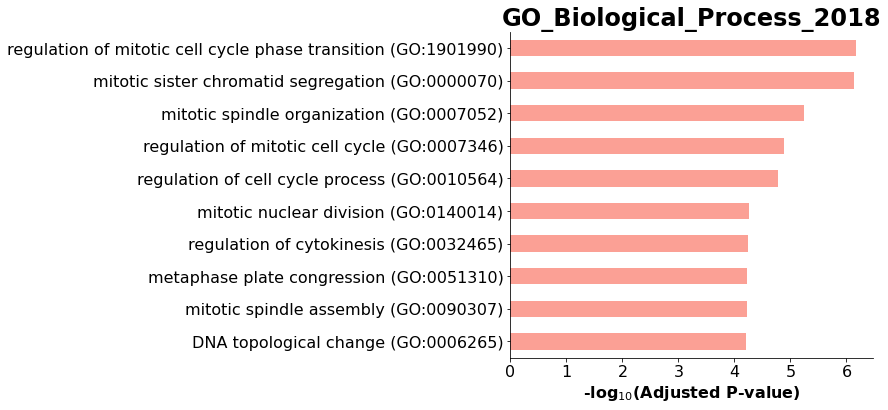

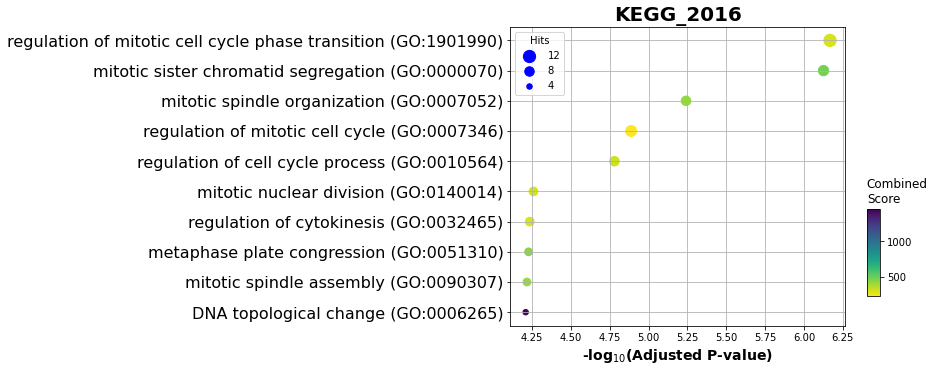

In [16]:
from gseapy.plot import barplot, dotplot
barplot(enr.res2d, title='GO_Biological_Process_2018', cutoff=0.05)
dotplot(enr.res2d, title='KEGG_2016',cmap='viridis_r', cutoff=0.05)

In [26]:
enr = dyn.ext.enrichr(adata.uns['rank_acceleration']['Ngn3 low EP'][:100].to_list(), organism='mouse', outdir='./enrichr')
enr.results.head(5)

2020-09-17 22:19:40,583 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.05


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2018,axonogenesis (GO:0007409),7/223,0.000130,0.661665,0,0,6.278027,56.191982,VASP;APP;LINGO1;LRRN2;TUBB3;MAP1B;GFRA3
1,GO_Biological_Process_2018,purine ribonucleotide metabolic process (GO:00...,4/66,0.000334,0.853025,0,0,12.121212,97.010941,TPST2;SULT2B1;ACLY;HSPA8
2,GO_Biological_Process_2018,negative regulation of JNK cascade (GO:0046329),3/28,0.000363,0.617159,0,0,21.428571,169.748570,DNAJA1;DUSP10;AMBP
3,GO_Biological_Process_2018,negative regulation of cell proliferation (GO:...,8/363,0.000475,0.606357,0,0,4.407713,33.725958,SULT2B1;CDKN1C;APP;BTG2;DUSP10;E2F1;TOB1;CBFA2T3
4,GO_Biological_Process_2018,oxoacid metabolic process (GO:0043436),3/32,0.000541,0.552574,0,0,18.750000,141.024624,TPST2;SULT2B1;SULF2
